# CSE474/574 - Programming Assignment 1

For grading, we will execute the submitted notebook as follows:

```shell
jupyter nbconvert --to python PA1Script.ipynb
python PA1Script.py
```

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [2]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [3]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    X_t = np.transpose(X)
    xtx = np.dot(X_t,X)
    xtx1 = np.linalg.inv(xtx)
    xtxxty = np.dot(X_t,y)
    w = np.dot(xtx1,xtxxty)
    #print("shape",w.shape)
    return w

In [4]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    calc = 0
    for i in range(len(Xtest)):
        wtx = np.dot((np.transpose(w)),Xtest[i])
        wtxy = ytest[i]- wtx
    #print(wtx)
        sqr = wtxy ** 2
        calc = calc + sqr
    rmse = np.sqrt((1/len(Xtest)) * calc)
    #print("rmse",rmse)
    return rmse

In [5]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')  
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [6]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [7]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    Xw = np.dot(X,w)
    #print("xw", Xw.shape)
    Xw = Xw.reshape((Xw.shape[0],1))
    #print("new xw", Xw.shape)
    yxw = y - Xw
    jw = np.dot(yxw.T, yxw)
    #print("jw", jw.shape)
    error = (1/2) * jw
    #print("error", error.shape)
    #error = 0
    return error


In [8]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)
    Xtx = np.dot(X.T,X)
    #print("xtx",Xtx.shape)
    
    xtxw = np.dot(Xtx, w)

    #xtxw = xtxw.reshape((xtxw.shape[0],1))
    #print("xtxw",xtxw.shape)
    xty = np.dot(np.transpose(X),y)
    #print("xty",xty.shape)
    error_grad = xtxw - (xty[:,0])
    #print("djw",error_grad.shape)
    #print(error_grad)
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 
    #error_grad = (np.dot(np.dot(X.T,X),w)) -  (np.dot(X.T,y))
    #print(error_grad.shape)
    #error_grad = np.zeros((X.shape[1],))
    return error_grad

In [9]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 48.20
Gradient Descent Linear Regression RMSE on test data - 54.67


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [10]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [11]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions
    #print("w shape", (w).shape)
    #print("wt shape", (w.T).shape)
    #print("xtest shape", Xtest.shape)
    ypred = np.dot(Xtest,w)
    #print(ypred.shape)
    for i,ans in enumerate(ypred):
        if ans>=0:
            ypred[i] = 1
        else:
            ypred[i] = -1
        
            

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #ypred = np.zeros([Xtest.shape[0],1])
   # print("shape ypred",ypred)
    return ypred

In [12]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values
    ypred = predictLinearModel(w,Xtest)
    #print("ypred",ypred)
    #print("ytest",ytest)
    #print("next")
    trues = 0
    for i in range(len(ypred)):
        if ypred[i] == ytest[i]:
            trues = trues+1
           # print("true")
    
    
   # print("len y test", len(ytest))
    #print("len y pred", len(ypred))
    #print("true", trues)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    acc=0
    acc = trues/len(ypred) 
    
    return acc

In [13]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 

# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 0.84
Perceptron Accuracy on test data - 0.84


### Problem 4 - Logistic Regression Using Newton's Method

In [14]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [15]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
        
    addd = 0
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    for i in range(len(X)):
        exp = np.exp(np.dot(-y[i] , np.dot(w.T, X[i]) ))
        log_x = np.log(1+exp)
        addd = addd + log_x
    
    error = (1/ len(X)) * addd
   # print("error" , error.shape)
    
   # error = 0
    return error


In [16]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    sum1 = 0
    for i in range(len(X)):
        exp = 1 + (np.exp(np.dot(y[i] , np.dot(w.T, X[i]) )))
        yixi = (y[i] / exp) * X[i]
        sum1 = sum1 + yixi
    
    gradient = (-1 / len(X)) * sum1
        
    #print("gradient", gradient)
    
    #gradient = np.zeros((w.shape[0],))
    return gradient

In [262]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
  
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    '''
    sum2 = 0
    heee = []
    #hessian = []
    for i in range(len(X)):
        exp =  np.exp(np.dot(y[i] , np.dot(w.T, X[i]) ))
        print(X[i])
        one_exp = np.square(1+exp)
        div = np.divide(exp,one_exp)
        xixit = np.dot(X[i], X[i].T)
        mul = div * xixit
        
        sum2 = sum2 + mul
        heee.append(sum2)
    #final = (1/len(X)) *sum2
    '''

    sum2 = 0
    for i in range(X.shape[0]):
        
        b = np.reshape(X[i], (3,1))
        c = np.reshape(y[i], (1,1))
        
        dd = np.dot(c,w.T)
        exp =  np.exp(np.dot(b,dd))
        
        one_exp = np.square(1+exp)
        div = np.divide(exp,one_exp)
        xixit = np.dot(b, b.T)
        mul = np.dot(div , xixit)
        sum2 = sum2 + mul
    final = np.multiply((1/len(X)) , sum2)
    
    
    
    hessian = final
    
    #hessian = np.eye(X.shape[1])
    #print(hessian)
    return hessian

In [263]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
#print(Xtrain_i)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 0.84
Logistic Regression Accuracy on test data - 0.86


### Problem 5 - Support Vector Machines Using Gradient Descent

In [ ]:
print('PROBLEM 5')
print('----------')

In [314]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    w = np.zeros((X.shape[1], 1))
    w = w.T
    
    for i in range(T):
        bc = np.random.randint(0, X.shape[0], size = 1)
        #print("ybc shape", y[bc].shape)
        #print("w shpe", w.shape)
        hi = np.dot(y[bc], w)
        yiwtx = np.dot(hi,X[bc].T)
        if (yiwtx < 1):
            w += (eta * np.dot(y[bc],X[bc]))
    
    
    
    #print(w)
    # IMPLEMENT THIS METHOD
    #w = np.zeros([X.shape[1],1])
    return w.T

In [315]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 0.85
SVM Accuracy on test data - 0.86


### Problem 6 - Plotting decision boundaries

In [316]:
print('Problem 6')
print('---------')

Problem 6
---------


In [322]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

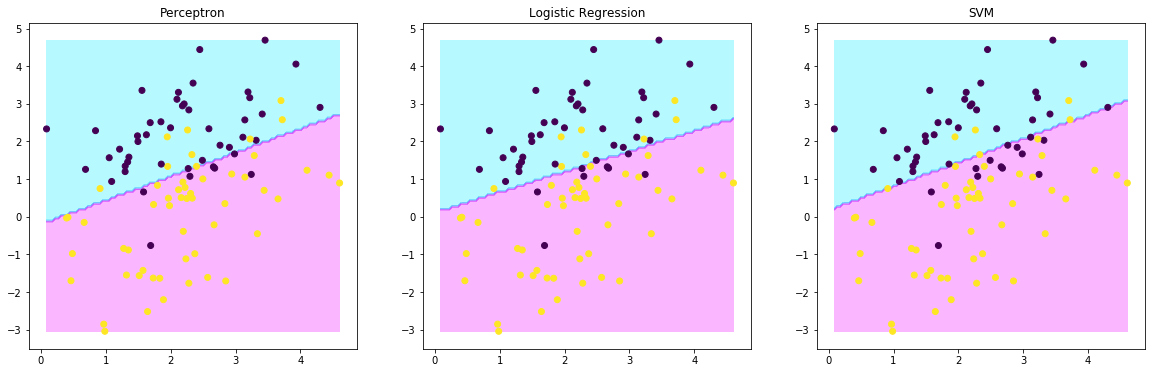

In [327]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
np.transpose(np.array(soln.x))


w_perceptron = np.transpose(np.array((minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)).x))

w_logistic = np.transpose(np.array((minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)).x))
w_svm = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
